<a href="https://colab.research.google.com/github/shubham404-error/ML-Assignment/blob/main/Diabetes%20Machine%20Learning%20Model%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**:

Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports.

So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.

**What is Diabetes ?**

Diabetes is a group of diseases in which the body doesn’t produce enough or any insulin, doesn’t properly use the insulin that is produced, or exhibits a combination of both. When any of these things happens, the body is unable to get sugar from the blood into the cells. That leads to high blood sugar levels.

Glucose, the form of sugar found in your blood, is one of your main energy sources. A lack of insulin or resistance to insulin causes sugar to build up in your blood. This can lead to many health problems.

The three main types of diabetes are:

type 1 diabetes,

type 2 diabetes, 

gestational diabetes.


**About Dataset**:

Pregnancies: No. of times pregnant

Glucose: Plasma Glucose Concentration (mg/dl)

Blood Pressure: Diastolic Blood Pressure(mmHg)

Skin Thickness: A value used to estimate body fat. 
Normal Triceps SkinFold Thickness in women is 23mm.

Higher thickness leads to obesity and chances of diabetes increases.

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/ height in m2)

Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

Age:Age (years)

Outcome: Class Variable (0 or 1) 
where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diab = pd.read_csv('diabetes.csv')

### Checking The Data

In [ ]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The data looks clean. So we can start with the analysis.

### Basic EDA

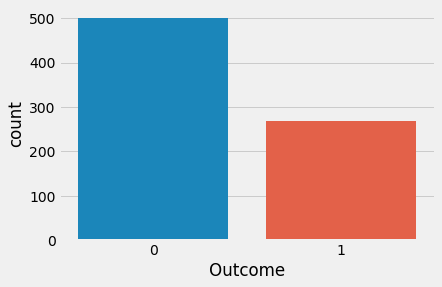

In [ ]:
sns.countplot(x='Outcome',data=diab)
plt.show()

### Brief Analysis of the data

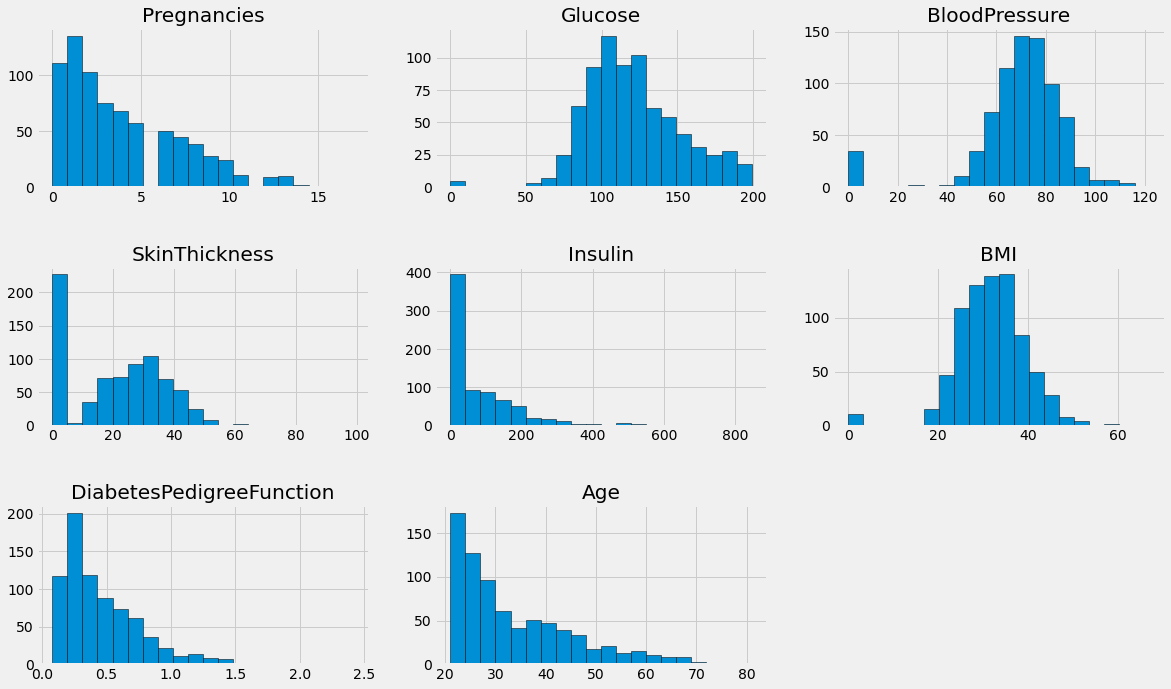

In [ ]:
columns=diab.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length//2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Analysis Of Diabetic Cases

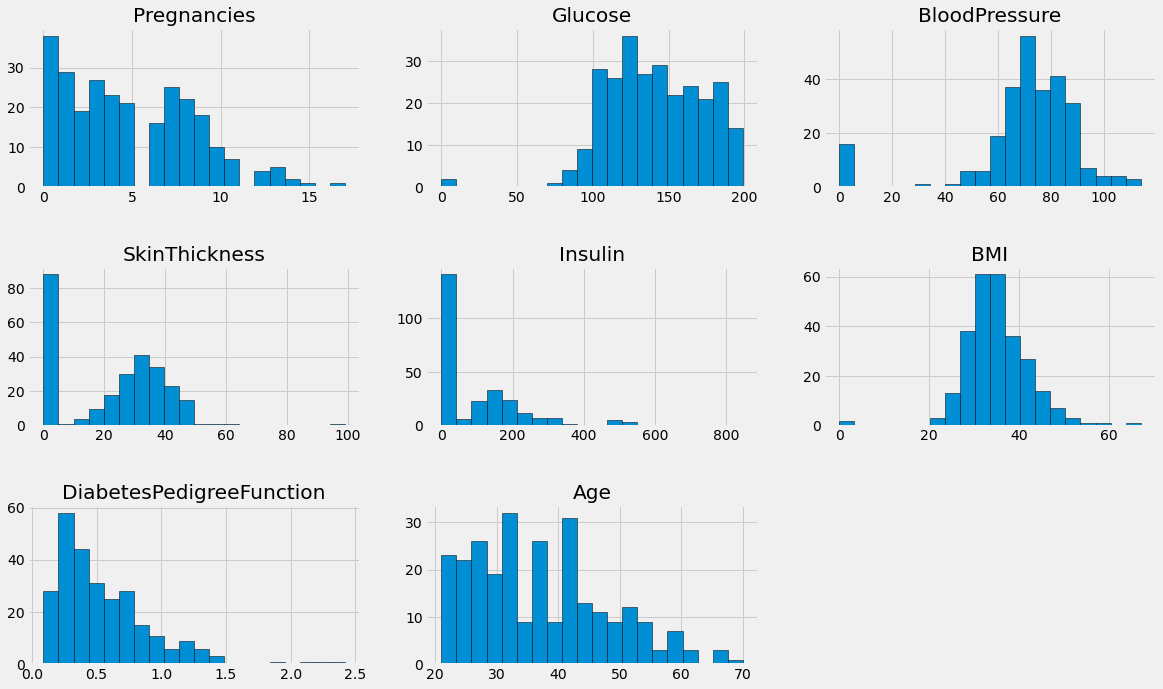

In [ ]:
diab1=diab[diab['Outcome']==1]
columns=diab.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length//2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### PairPlots:

Lets us see the distribution of the features in the dataset

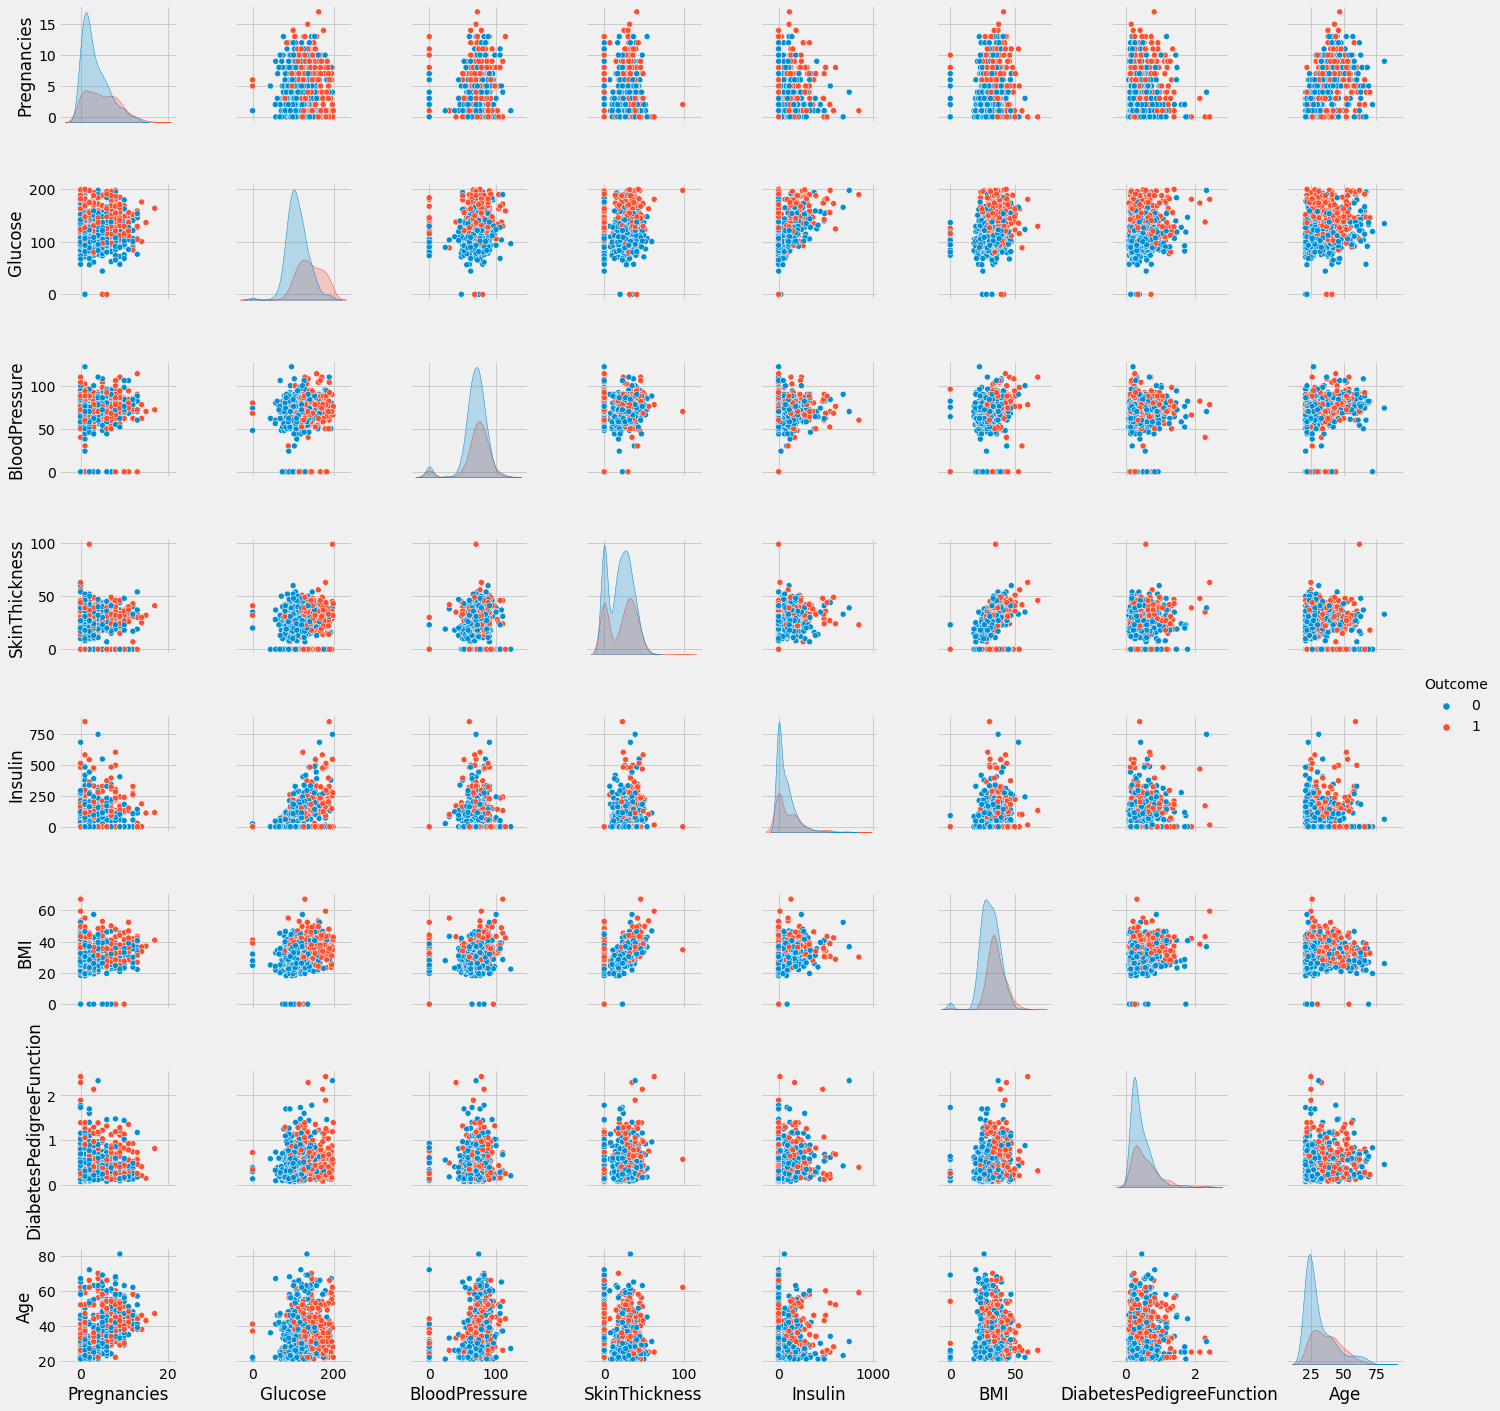

In [ ]:
sns.pairplot(data=diab,hue='Outcome',diag_kind='kde')
plt.show()

### Observations:

1)The diagonal shows the distribution of the the dataset with the kernel density plots.

2)The scatter-plots shows the relation between each and every attribute or features taken pairwise.
Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two outcome-class instances.

### Let's Do Some Predictive Modeling

In [ ]:
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

### Stratification:
When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

In [ ]:
outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [ ]:
train_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72


In [ ]:
train_Y.head(2)

432    0
453    0
Name: Outcome, dtype: int64

### 1. Decision Tree

In [ ]:
mod_1=DecisionTreeClassifier(random_state=0)
mod_1.fit(train_X,train_Y)
prediction=mod_1.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))


The accuracy of the Decision Tree is 0.7604166666666666


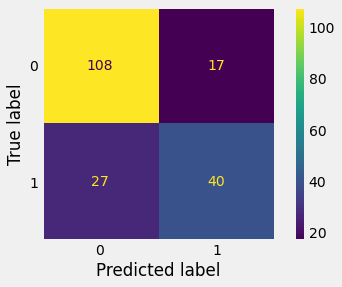

In [ ]:
plot_confusion_matrix(mod_1,test_X,test_Y)
plt.grid(False)
plt.show()

###2. Logistic Regression.

In [ ]:
model_2 = LogisticRegression(random_state=0)
model_2.fit(train_X,train_Y)
prediction=model_2.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.78125


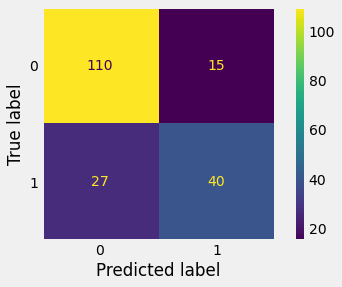

In [ ]:
plot_confusion_matrix(model_2,test_X,test_Y)
plt.grid(False)
plt.show()

###3. Multi Layer Perceptron

In [ ]:
mod_3=MLPClassifier(alpha=1, max_iter=500,random_state=0).fit(train_X,train_Y)
y_pre = mod_3.predict(test_X)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_pre,test_Y))


The accuracy of the model on validation set is 0.7447916666666666


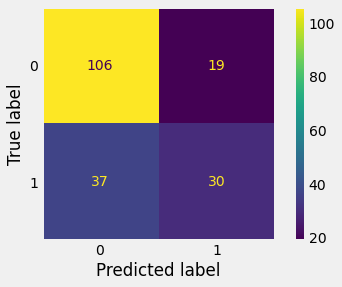

In [ ]:
plot_confusion_matrix(mod_3,test_X,test_Y)
plt.grid(False)
plt.show()

### 4. SVM

In [ ]:
types=['rbf','linear']
for i in types:
    mod_4=svm.SVC(kernel=i)
    mod_4.fit(train_X,train_Y)
    prediction=mod_4.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.765625
Accuracy for SVM kernel= linear is 0.7708333333333334


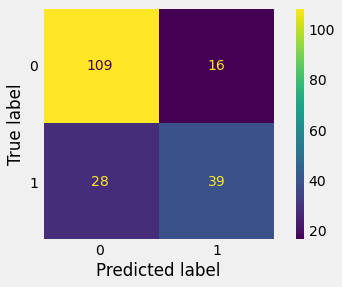

In [ ]:
plot_confusion_matrix(mod_4,test_X,test_Y)
plt.grid(False)
plt.show()

### 5. Adaboost Algorithm

In [ ]:
mod_5 = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100, random_state= 0)
mod_5.fit(train_X, train_Y)
y_pred= mod_5.predict(test_X)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_pred,test_Y))

The accuracy of the model on validation set is 0.7708333333333334


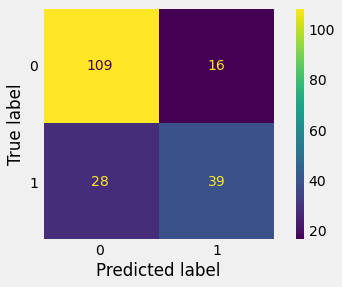

In [ ]:
plot_confusion_matrix(mod_5,test_X,test_Y)
plt.grid(False)
plt.show()

###6. Random Forest   

In [ ]:
mod_6 = RandomForestClassifier(criterion= 'entropy', n_estimators= 300, random_state= 0)
mod_6.fit(train_X, train_Y)
y_pred = mod_6.predict(test_X)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_pred,test_Y))

The accuracy of the model on validation set is 0.7916666666666666


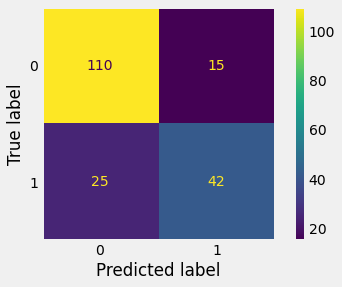

In [ ]:
plot_confusion_matrix(mod_6,test_X,test_Y)
plt.grid(False)
plt.show()

###7. K-means Clustering

In [ ]:
from sklearn.cluster import KMeans
mod_7 = KMeans(n_clusters=1, random_state=0).fit(train_X)
y_mean = mod_7.predict(test_X)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_mean,test_Y))


The accuracy of the model on validation set is 0.6510416666666666


In [ ]:
print(confusion_matrix(test_Y,y_mean))

[[125   0]
 [ 67   0]]


### 8. PCA 

In [ ]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(train_X)

### 9. Balanced and unbalanced datasets.

###10. Comparison of Machine Learning Algorithms

In [ ]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','MLP','Random Forest','Adaboost','K-means']
models=[
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0),
    MLPClassifier(alpha=1, max_iter=500,random_state=0),
    RandomForestClassifier(criterion= 'entropy', n_estimators= 300, random_state= 0),
    AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100, random_state= 0),
    KMeans(n_clusters=1, random_state=0)]

for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.765625
Logistic Regression,0.781250
Decision Tree,0.760417
MLP,0.744792
Random Forest,0.791667
Adaboost,0.770833
K-means,0.651042
